### Getting data from yann lecunn dataset

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [1]:
import idx2numpy
import seaborn as sns

#### Extract Training data

In [2]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [3]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
X_train.shape

(60000, 784)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train.shape

(60000,)

#### Extract Test data

In [7]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [8]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
X_test.shape

(10000, 784)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
y_test.shape

(10000,)

#### Function to display a digit image from one 1-d representation of pixels

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
   
    image = image.reshape(28,28)
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

##### Displaying a set of digits

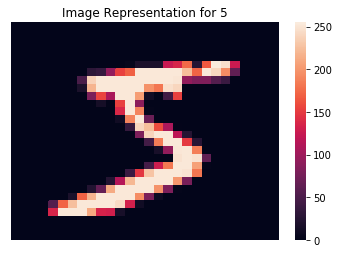

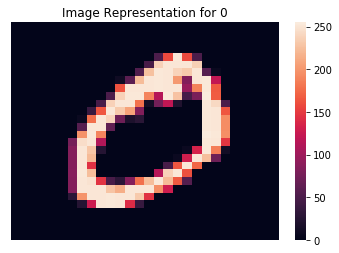

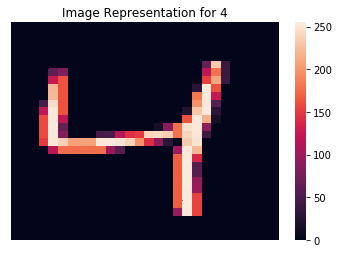

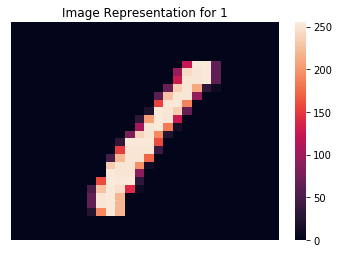

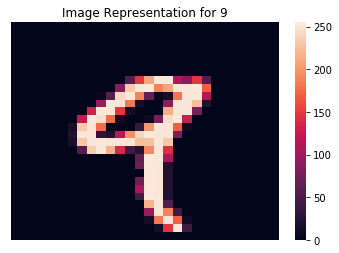

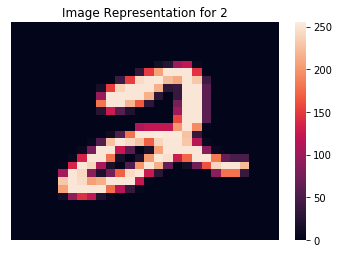

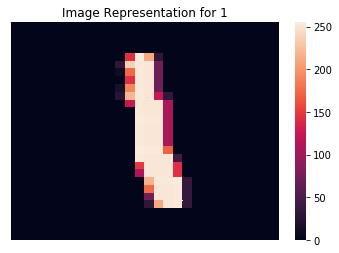

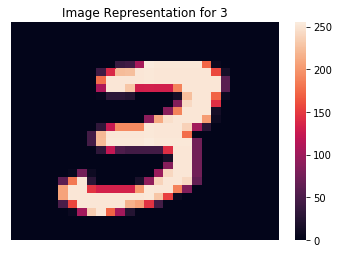

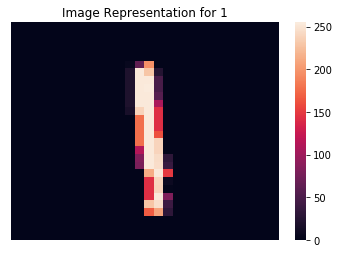

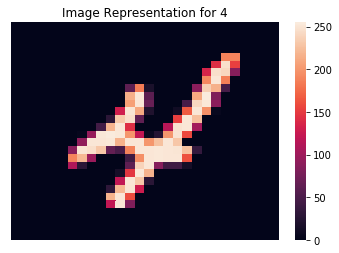

In [13]:
for i in range(10):
    display(X_train[i],y_train[i])

# Decision Tree

In [14]:
from sklearn import tree
from sklearn.model_selection import cross_val_predict


dt_clf = tree.DecisionTreeClassifier( max_depth=500)

y_train_pred = cross_val_predict(dt_clf, X_train, y_train, cv=3)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=500,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

##### Calculate Cross Validation Score

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.85792841,  0.85784289,  0.86357954])

y_train_pred is the predicted values in the train set such that the model has never seen the data before

In [16]:
y_train_pred

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Create a confusion matrix for cross validation prediction & actual labels**

In [18]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_train_pred)

In [19]:
confusionMatrix

array([[5393,    6,   67,   58,   33,   97,  119,   34,   78,   38],
       [   2, 6387,   83,   54,   21,   37,   35,   23,   73,   27],
       [  89,   68, 4942,  190,  114,   66,   90,  154,  175,   70],
       [  48,   65,  180, 5027,   50,  288,   45,  106,  206,  116],
       [  34,   39,   88,   45, 4991,   52,   92,   78,  112,  311],
       [  94,   62,   57,  257,   71, 4395,  140,   48,  184,  113],
       [  75,   45,   89,   44,  107,  153, 5236,   11,  126,   32],
       [  27,   32,  130,   86,   71,   46,    9, 5633,   52,  179],
       [  71,  128,  197,  225,  130,  184,   95,   79, 4560,  182],
       [  37,   31,   62,  128,  265,  102,   25,  197,  156, 4946]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

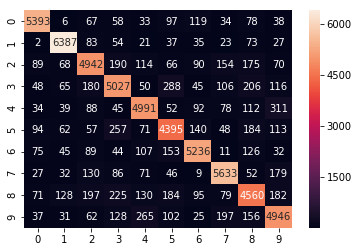

In [20]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [21]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

In [22]:
import numpy as np
#import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)

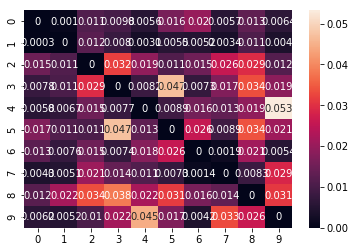

In [23]:
ax = sns.heatmap(norm_conf_mx,annot=True)

**Plot Confusion Matrix against Test data**

In [24]:
y_test_pred = dt_clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [25]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 914,    1,   12,    5,    4,    9,   16,    3,    9,    7],
       [   0, 1093,    8,    3,    4,    6,    8,    4,    8,    1],
       [  11,    6,  885,   36,   14,    8,   15,   23,   27,    7],
       [   6,   11,   24,  868,    7,   41,    3,   10,   23,   17],
       [   4,    3,    9,    4,  870,    8,   16,   10,   16,   42],
       [  17,    6,    3,   46,    8,  739,   22,    6,   25,   20],
       [  20,    4,   14,    7,   23,   23,  838,    2,   25,    2],
       [   3,    9,   20,   15,    8,    6,    6,  925,   12,   24],
       [  13,    7,   28,   34,   23,   26,   19,   10,  785,   29],
       [  17,    6,    9,   17,   44,   13,    7,   19,   20,  857]], dtype=int64)

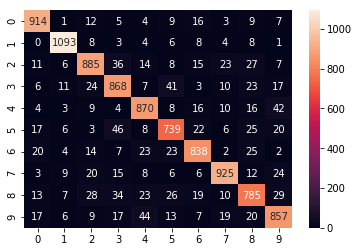

In [26]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [27]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

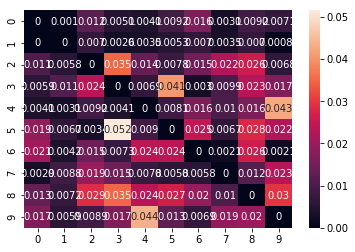

In [28]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.87739999999999996